In [2]:

#%% libraries
import pandas as pd
import matplotlib.pyplot as plt
#%% data

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
covid_df = pd.read_csv(url, index_col=0)

In [4]:
covid_df.head(5)

,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
UID,,,,,,,,,,,,,,,,,,,,,
84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,19732,19759,19759,19759,19759,19759,19759,19759,19790,19790
84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",...,69641,69767,69767,69767,69767,69767,69767,69767,69860,69860
84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",...,7451,7474,7474,7474,7474,7474,7474,7474,7485,7485
84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",...,8067,8087,8087,8087,8087,8087,8087,8087,8091,8091
84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",...,18616,18673,18673,18673,18673,18673,18673,18673,18704,18704


'''
Overall instructions:
As described in the homework description, each graphic you make must:
   1. Have a thoughtful title
   2. Have clearly labelled axes 
   3. Be legible
   4. Not be a pie chart
I should be able to run your .py file and recreate the graphics without error.
As per usual, any helper variables or columns you create should be thoughtfully
named.
'''

## Viz1
Create a visualization that shows all of the counties in Utah as a time series,
similar to the one shown in slide 22 during the lecture. The graphic should

-Show cases over time

-Have all counties plotted in a background color (something like grey)

-Have a single county plotted in a contrasting color (something not grey)

-Have well formatted dates as the X axis
'''

C:\Users\Victus\AppData\Local\Temp\ipykernel_22088\2154868251.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid_df_utah['Date'] = pd.to_datetime(covid_df_utah['Date'])
C:\Users\Victus\AppData\Local\Temp\ipykernel_22088\2154868251.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  covid_df_slc['Date'] = pd.to_datetime(covid_df_slc['Date'])
C:\Users\Victus\AppData\Local\Temp\ipykernel_22088\2154868251.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_slc

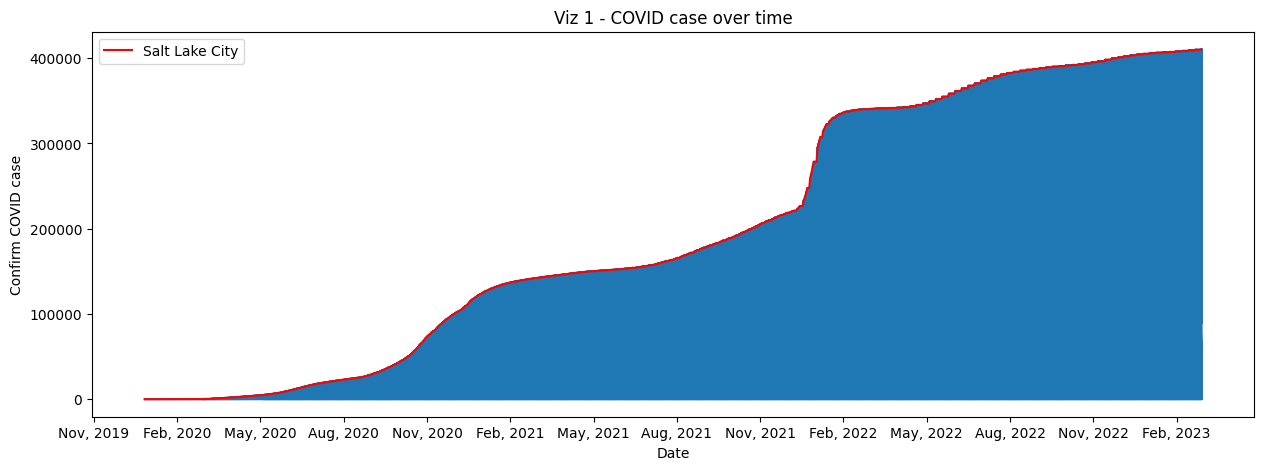

In [38]:
covid_df_utah = covid_df[covid_df['Province_State'] == 'Utah']

# covid_df_utah.iloc[:,4:15] # column after combine is date start from 1/22/20 .iloc[:,10] --- Focus county is 'Salt Lake' each column has unique county
covid_df_utah = covid_df_utah.melt(id_vars= covid_df_utah.columns[:10], value_vars= covid_df_utah.columns[10:], var_name= 'Date')
covid_df_slc = covid_df_utah[covid_df_utah['Admin2'] == 'Salt Lake']

# Convert 'Date' columns to datetime format
covid_df_utah['Date'] = pd.to_datetime(covid_df_utah['Date'])
covid_df_slc['Date'] = pd.to_datetime(covid_df_slc['Date'])


plt.figure(figsize=(15, 5))
plt.plot(covid_df_utah['Date'], covid_df_utah['value'])
plt.plot(covid_df_slc['Date'], covid_df_slc['value'], color = 'red',label = 'Salt Lake City')
plt.title('Viz 1 - COVID case over time')
plt.xlabel("Date")
plt.ylabel('Confirm COVID case')

# adjust x-axis to be legible and readable
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b, %Y'))  # Label format to be month, year
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=90))  # Set interval of date for every 90 days
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right') # rotate the label to the right 45 degree

plt.legend()
plt.show()




## viz 2

Create a visualization that shows the contrast between the county in Utah with
the most cases to date to a county in Florida with the most cases to date.
The graphic should:

-Have only two counties plotted

-Highlight the difference between the two comparison counties

You may use any style of graphic you like as long as it is effective (dense)
and readable
'''

In [5]:
# Viz 2
# Find the most cases in Utah and Florida county
covid_melt = covid_df.melt(id_vars= covid_df.columns[:10], value_vars= covid_df.columns[10:], var_name= 'Date')

covid_max_utah = covid_df_utah['value'].idxmax()
print(covid_df_utah.loc[covid_max_utah])

covid_florida = covid_melt[covid_melt['Province_State'] == 'Florida']
covid_max_florida = covid_florida['value'].idxmax()

print(covid_florida.loc[covid_max_florida])

iso2                               US
iso3                              USA
code3                             840
FIPS                          49035.0
Admin2                      Salt Lake
Province_State                   Utah
Country_Region                     US
Lat                         40.666165
Long_                     -111.921601
Combined_Key      Salt Lake, Utah, US
Date                           3/9/23
value                          410508
Name: 42274, dtype: object
iso2                                   US
iso3                                  USA
code3                                 840
FIPS                              12086.0
Admin2                         Miami-Dade
Province_State                    Florida
Country_Region                         US
Lat                             25.611236
Long_                          -80.551706
Combined_Key      Miami-Dade, Florida, US
Date                               3/3/23
value                             1552197
Name: 3796896

Text(0.5, 1.0, 'Viz 2- COVID cases comparing to Utah and Florida')

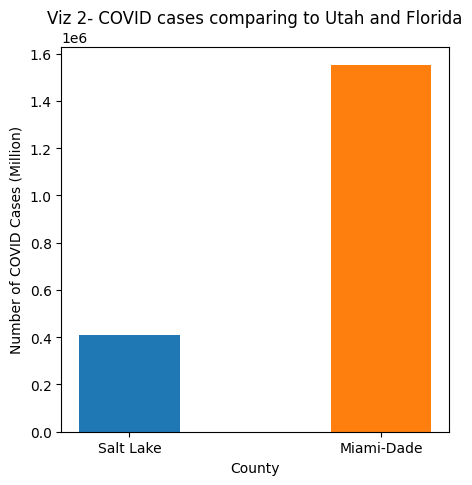

In [19]:
# viz 2 cont.
# After finding the most value of COVID case in Utah and Florida, I got county named Salt Lake and Miami-Dade, respectively.


plt.figure(figsize=(5, 5))
plt.bar(covid_df_utah.loc[covid_max_utah]['Admin2'],covid_df_utah.loc[covid_max_utah]['value'], width= 0.4 )
plt.bar(covid_florida.loc[covid_max_florida]['Admin2'],covid_florida.loc[covid_max_florida]['value'] , width= 0.4)

# Label the x and y axes
plt.xlabel('County')
plt.ylabel('Number of COVID Cases (Million)')
plt.title('Viz 2- COVID cases comparing to Utah and Florida')

## viz 3
'''
Create a visualization that shows BOTH the running total of cases for a single
county AND the daily new cases. The graphic should:

-Use two y-axes (https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html)

-Use color to contrast the two series being plotted

-Have well formatted dates as the X axis
'''

C:\Users\Victus\AppData\Local\Temp\ipykernel_22088\4050254252.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_slc['Date'] = pd.to_datetime(covid_df_slc['Date'])
C:\Users\Victus\AppData\Local\Temp\ipykernel_22088\4050254252.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df_slc['New_Cases'] = covid_df_slc['value'].diff()


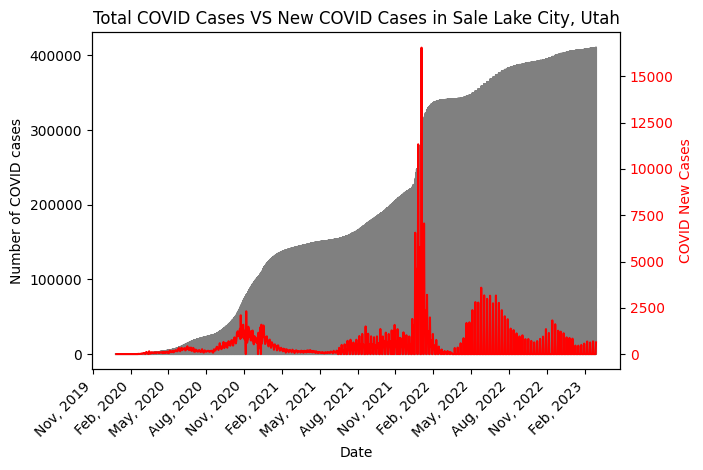

In [76]:
#Viz 3 I use Salt Lake City data for representing the graph
# Find the new cases by using diff in the accumulated value column
import matplotlib.dates as mdates
from matplotlib.dates import AutoDateFormatter, AutoDateLocator

# Convert 'Date' columns to datetime format
covid_df_utah['Date'] = pd.to_datetime(covid_df_utah['Date'])
covid_df_slc['Date'] = pd.to_datetime(covid_df_slc['Date'])
# create the new cases of Salt Lake City
covid_df_slc['New_Cases'] = covid_df_slc['value'].diff()

# plot the graph for accumurated cases
fig, ax1 = plt.subplots() # create figure and axes
ax1.plot(covid_df_utah['Date'],covid_df_utah['value'], color ='grey')
ax1.set_xlabel('Date')
ax1.set_ylabel('Number of COVID cases')
ax1.set_title('Total COVID Cases VS New COVID Cases in Sale Lake City, Utah')

# adjust x-axis to be legible and readable
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b, %Y')) # label format to be a month, year
ax1.xaxis.set_major_locator(plt.matplotlib.dates.DayLocator(interval=90)) # set interval of date for every 90 days
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right') # rotate the label to the right 45 degree
fig.tight_layout() # Adjust the layout
ax2 =ax1.twinx() # instantiate a second Axes that shares the same x-axis

# plot the line graph for one city 
ax2.plot(covid_df_slc['Date'], covid_df_slc['New_Cases'], color = 'red')
ax2.set_ylabel('COVID New Cases', color = 'red')
ax2.tick_params(axis='y', labelcolor='red')




## viz 4
'''
Create a visualization that shows a stacked bar chart of county contributions
to a given state's total cases. You may choose any state (or states).

(https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html#sphx-glr-gallery-lines-bars-and-markers-bar-stacked-py)
The graphic should:

-Have a single column delineate a state

-Have each 'slice' or column compontent represent a county
'''

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3342,) and arg 3 with shape (3,).

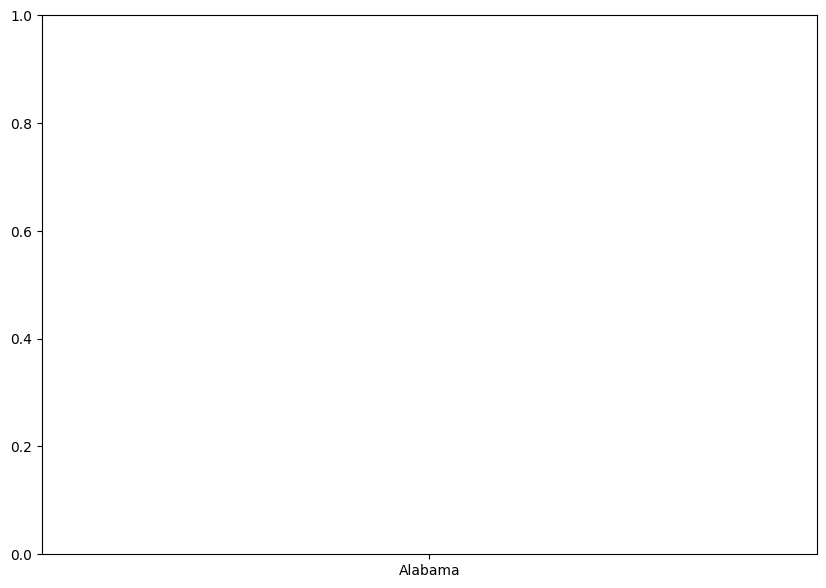

In [ ]:
# viz 4

# select the total cases of every states (I choose to filter the last day of report)
# covid_df['3/9/23'] / ['Province_State'] / ['Admin2']

# iterrows to iterate the dataframe
width = 0.5

# Plotting
fig, ax = plt.subplots(figsize=(10, 7))
bottom = np.zeros()

for idx, row in covid_df.iterrows():
    p = ax.bar(covid_df['Province_State'], covid_df['3/9/23'],width= 0.5, label = covid_df['Admin2'],bottom= bottom)
    bottom += covid_df['3/9/23']


# Add labels and title
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('State')
ax.set_ylabel('Number of COVID-19 Cases')
ax.set_title('County Contributions to Total COVID-19 Cases in Utah')
ax.legend(title='County')
# Show the plot
plt.show()

## extra credit (5 points)
'''
Use Seaborn to create a grouped box plot of all reported states. Each boxplot
should be a distinct state. Have the states ordered from most cases (FL) to fewest 

cases. (https://seaborn.pydata.org/examples/grouped_boxplot.html)
'''